In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
import numpy as np

import darkhistory.physics as phys
from darkhistory.history.tla import get_history

import main
import config
from tqdm import tqdm_notebook as tqdm

In [7]:
rs_vec = 3000*np.exp(-.004*np.arange(1595))

no_br = get_history(
    rs_vec, baseline_f = True,
    inj_particle = 'elec', DM_process = 'decay',
    mDM=100e6, lifetime = 3e25,
)

br_data = main.evolve(
    primary='elec_delta',
    DM_process='decay', mDM=100e6, lifetime=3e25,
    start_rs = 3000, end_rs=4,
    coarsen_factor=16, backreaction=True,
    struct_boost = None
)

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [10]:
baseline = get_history(
    rs_vec
)

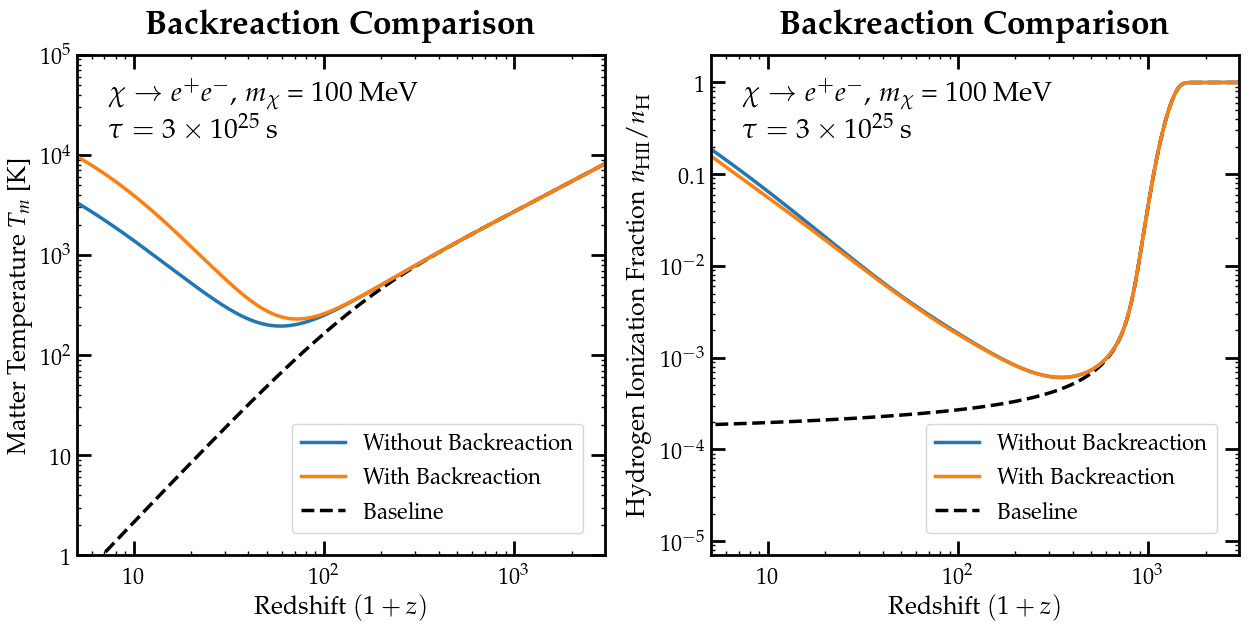

In [11]:
fig_BR_example = plt.figure(figsize=(15,6.5))

ax = plt.subplot(1,2,1)

ax = plt.gca()
ax.loglog()

plt.xlabel('Redshift $(1+z)$')
plt.ylabel('Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Backreaction Comparison}')

plt.axis([5, 3e3, 1, 1e5])

plot_std, = plt.plot(rs_vec, baseline[:,0]/phys.kB, 'k--', label='Baseline')
plot_no_BR, = plt.plot(rs_vec, no_br[:,0]/phys.kB, label='Without Backreaction', color='C0')
plot_BR, = plt.plot(br_data['rs'], br_data['Tm']/phys.kB, label='With Backreaction', color='C1')

plt.text(0.06, 0.9, r'$\chi \to e^+e^-$, $m_\chi$ = 100 MeV', transform=ax.transAxes, fontsize=20)
plt.text(0.06, 0.84, r'$\tau = 3 \times 10^{25}$ s', transform=ax.transAxes, fontsize=20)

legend = plt.legend(
    handles=[plot_no_BR, plot_BR, plot_std], loc='lower right'
)

ax = plt.subplot(1,2,2)

ax = plt.gca()
ax.loglog()

plt.xlabel('Redshift $(1+z)$')
plt.ylabel('Hydrogen Ionization Fraction $n_\mathrm{HII}/n_\mathrm{H}$')

plt.title(r'\bf{Backreaction Comparison}')

plt.axis([5, 3e3, 7e-6, 2])

plot_std, = plt.plot(rs_vec, baseline[:,1], 'k--', label='Baseline')
plot_no_BR, = plt.plot(rs_vec, no_br[:,1], label='Without Backreaction', color='C0')
plot_BR, = plt.plot(br_data['rs'], br_data['x'][:,0], label='With Backreaction', color='C1')

plt.text(0.06, 0.9, r'$\chi \to e^+e^-$, $m_\chi$ = 100 MeV', transform=ax.transAxes, fontsize=20)
plt.text(0.06, 0.84, r'$\tau = 3 \times 10^{25}$ s', transform=ax.transAxes, fontsize=20)

legend = plt.legend(
    handles=[plot_no_BR, plot_BR, plot_std], loc='lower right'
)

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/backreaction_comparison.pdf')